### ML program on IRIS dataset to understand Logistic Regression & K-NN (K-Nearest Neighbors)

We will use scikit-learn library to perform this Supervised learning activity with IRIS flower dataset which is even a part of sklearn library

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
iris = load_iris()

In [71]:
# checking whether we have correct data loaded in our variable 'iris'
print(iris.data[55:58])

[[5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]]


In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
# Printing the names of iris flower types
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


Let us divide our dataset into test and training sets. We will used k-fold validation technique. This technique makes sures that every sample is used for training and testing. Thus we get the most accurate model

In [29]:
# Importing the library for K-Fold

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [26]:
logreg = LogisticRegression()

In [27]:
X = iris.data
y = iris.target

In [28]:
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())


0.9533333333333334


In [55]:
knn = KNeighborsClassifier(n_neighbors=14)

In [56]:

print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9733333333333334


In [63]:
kf = KFold(n_splits=10, shuffle=True)
kf.split(y)

<generator object _BaseKFold.split at 0x00000249ADE5F570>

In [76]:
for train_index, test_index in kf.split(y):
    #print('train', train_index, '\n\ntest', test_index, '\n\n ######### \n\n')
    y_train, y_test = y[train_index], y[test_index]

train [  2   3   4   5   7   8   9  10  11  12  13  14  15  17  18  20  21  22
  23  26  27  31  32  33  35  36  39  40  41  42  43  44  45  46  47  49
  52  54  55  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72
  74  76  81  82  83  84  86  88  89  90  91  93  96  97  99 100 102 105
 106 108 109 111 112 113 117 118 120 121 124 125 126 127 128 129 132 133
 135 136 137 138 139 140 142 145 146 147] 

test [  0   1   6  16  19  24  25  28  29  30  34  37  38  48  50  51  53  56
  67  73  75  77  78  79  80  85  87  92  94  95  98 101 103 104 107 110
 114 115 116 119 122 123 130 131 134 141 143 144 148 149] 

 ######### 


train [  0   1   2   4   6   7  11  13  15  16  19  20  21  23  24  25  28  29
  30  31  32  33  34  35  37  38  39  40  41  42  43  46  47  48  49  50
  51  53  56  58  59  62  63  64  67  69  73  74  75  76  77  78  79  80
  81  84  85  86  87  88  91  92  94  95  96  98 100 101 103 104 105 107
 109 110 112 113 114 115 116 118 119 121 122 123 126 129 130 1

In [48]:
k_range = range(1,31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [49]:
print('Length of k',len(k_scores))
print('Maximum score',max(k_scores))

Length of k 30
Maximum score 0.9800000000000001


In [50]:
k_scores.index(max(k_scores))

12

Text(0,0.5,'Cross-validation Accuracy')

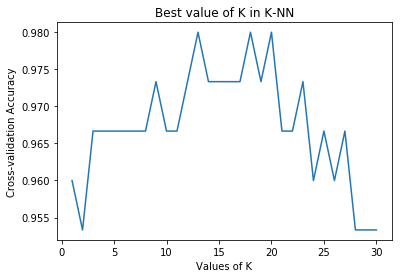

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.title('Best value of K in K-NN')
plt.xlabel('Values of K')
plt.ylabel('Cross-validation Accuracy')


In [78]:
logreg.fit(X, y)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [76]:
# Testing our classifier with a dummy dataset

logreg.predict([[6.2,3.3,3.5,1.8]])

array([1])

In [81]:
knn.predict([[4.2,3.3,2.5,0.8]])

array([0])